In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('C:/Users/LUCAS/electrical_fault/data/processed/df_cut_unif.csv', converters={'faultCode': lambda x: str(x)})

print(df.shape)
df.head()

(6298, 7)


,Ia,Ib,Ic,Va,Vb,Vc,faultCode
0,24.190644,67.230217,-94.606479,-0.451700,0.603994,-0.152294,0000
1,23.328510,68.100750,-94.622805,-0.458241,0.601277,-0.143036,0000
2,22.458598,68.963469,-94.623578,-0.464673,0.598416,-0.133743,0000
3,21.581168,69.818215,-94.608741,-0.470994,0.595414,-0.124420,0000
4,20.696498,70.664850,-94.578227,-0.477202,0.592270,-0.115068,0000


In [3]:
df['faultName'] = df['faultCode'].map({'1001': 'LG', '1011': 'LLG', '0110': 'LL', '0111': 'Sym', '0000': 'NoFault'})

In [4]:
df.describe()

,Ia,Ib,Ic,Va,Vb,Vc
count,6298.000000,6298.000000,6298.000000,6298.000000,6298.000000,6298.000000
mean,9.273733,13.595513,-8.831593,-0.013818,-0.000542,0.014360
std,455.596349,435.465926,369.139905,0.301144,0.314159,0.313406
min,-883.542316,-889.927217,-883.357762,-0.620748,-0.605916,-0.612709
25%,-71.659325,-69.176912,-78.967033,-0.174394,-0.167018,-0.197429
50%,-6.326366,27.893693,-12.946470,-0.003296,-0.001055,0.008226
75%,131.425491,96.907431,39.779285,0.121427,0.143703,0.251965
max,885.738571,889.868884,884.383782,0.593432,0.627046,0.600179


In [5]:
df.groupby('faultName').max()

,Ia,Ib,Ic,Va,Vb,Vc,faultCode
faultName,,,,,,,
LG,879.342097,70.788089,49.930819,0.382749,0.605916,0.329136,1001
LL,56.947217,785.086984,755.328077,0.501551,0.042370,0.547858,0110
LLG,872.611973,889.868884,57.782565,0.042378,0.376540,0.338184,1011
NoFault,55.647086,100.247141,37.165096,0.593432,0.627046,0.600179,0000
Sym,885.738571,884.095418,884.383782,0.042363,0.042398,0.042345,0111


In [11]:
def plotIxV(code):
    mask = df['faultCode'] == code
    
    sns.set(rc={'axes.facecolor':'efeae5', 'figure.facecolor':'efeae5'})
    fig, ax = plt.subplots(1, 3, figsize=(22, 7))
    sns.scatterplot(data=df[mask], x='Ia', y='Va', ax=ax[0], color='r')
    sns.scatterplot(data=df[mask], x='Ib', y='Vb', ax=ax[1], color='r')
    sns.scatterplot(data=df[mask], x='Ic', y='Vc', ax=ax[2], color='r')
    
    plt.setp(ax, xlim=(-920, 920), ylim=(-0.67, 0.67))
    
    ax[0].set_title(f"Nome do erro:  {df[mask]['faultName'].unique()[0]}\n", {'fontsize': 18})
    ax[0].set_xlabel('Ia' ,fontsize=14)
    ax[0].set_ylabel('Va', fontsize=14)
    ax[0].spines.right.set_visible(False)
    ax[0].spines.top.set_visible(False)
    
    ax[1].set_xlabel('Ib', fontsize=14)
    ax[1].set_ylabel('Vb', fontsize=14)
    ax[1].spines.right.set_visible(False)
    ax[1].spines.top.set_visible(False)
    
    ax[2].set_xlabel('Ic', fontsize=14)
    ax[2].set_ylabel('Vc', fontsize=14)
    ax[2].spines.right.set_visible(False)
    ax[2].spines.top.set_visible(False)
    
    plt.tight_layout()
    plt.show()

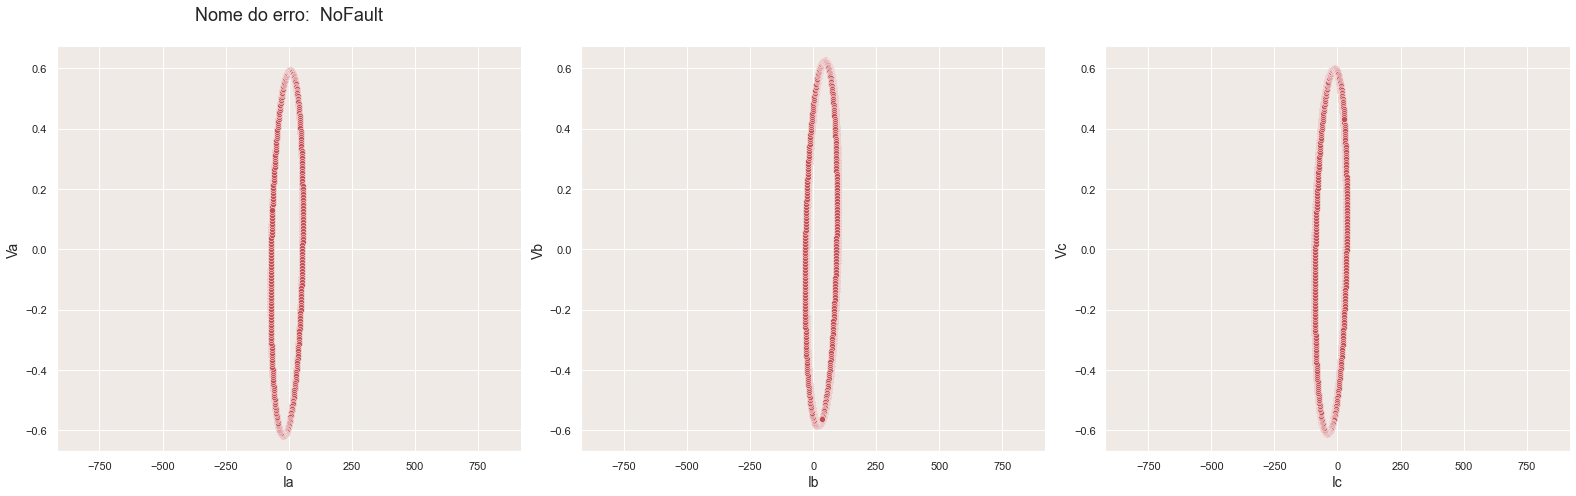

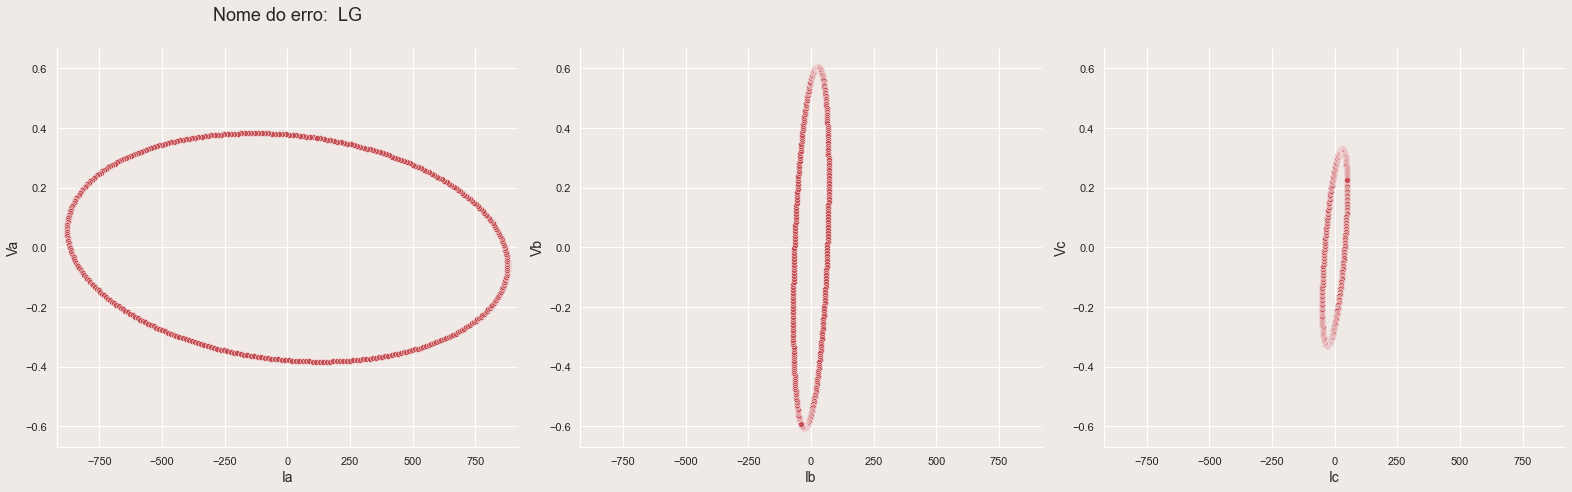

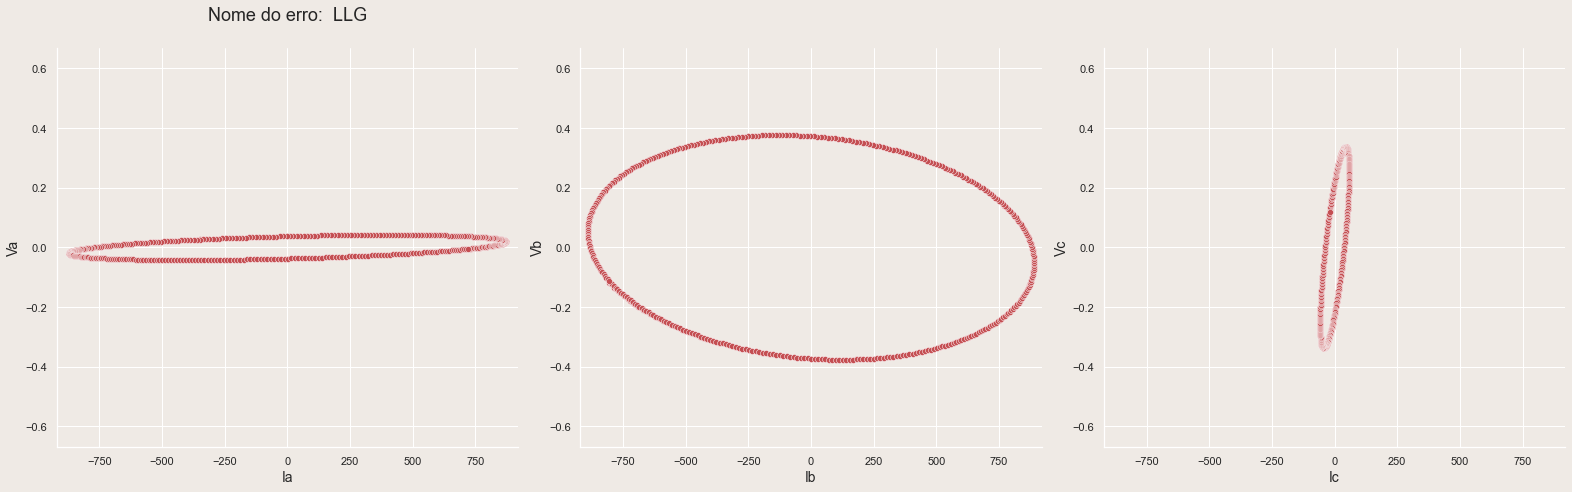

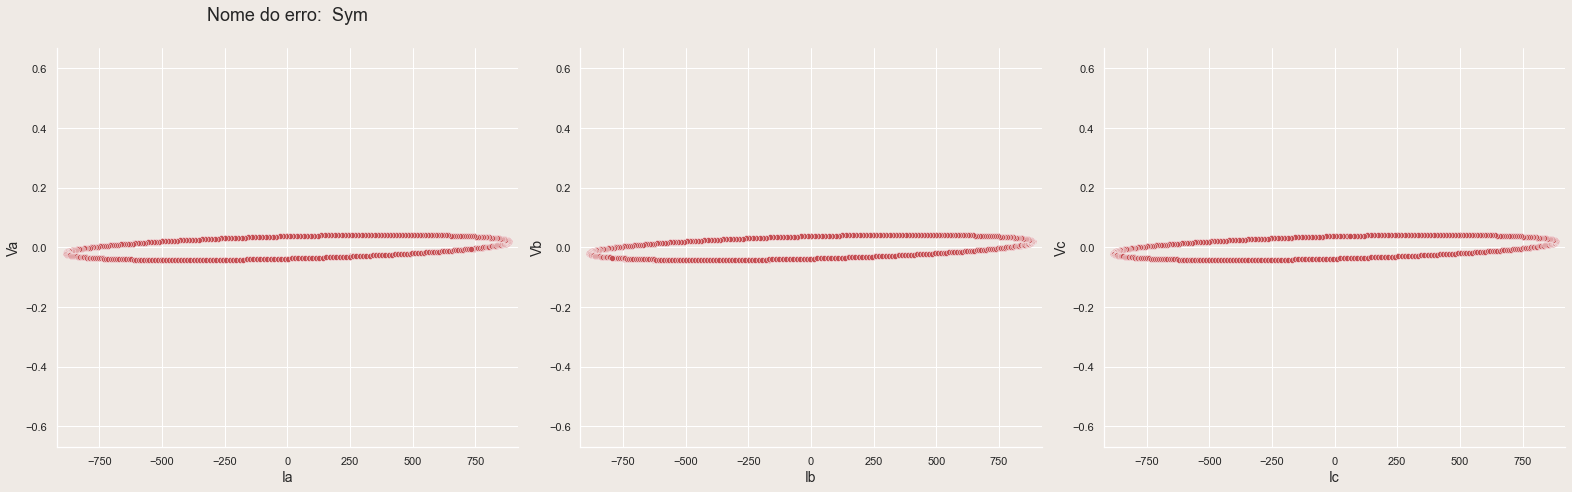

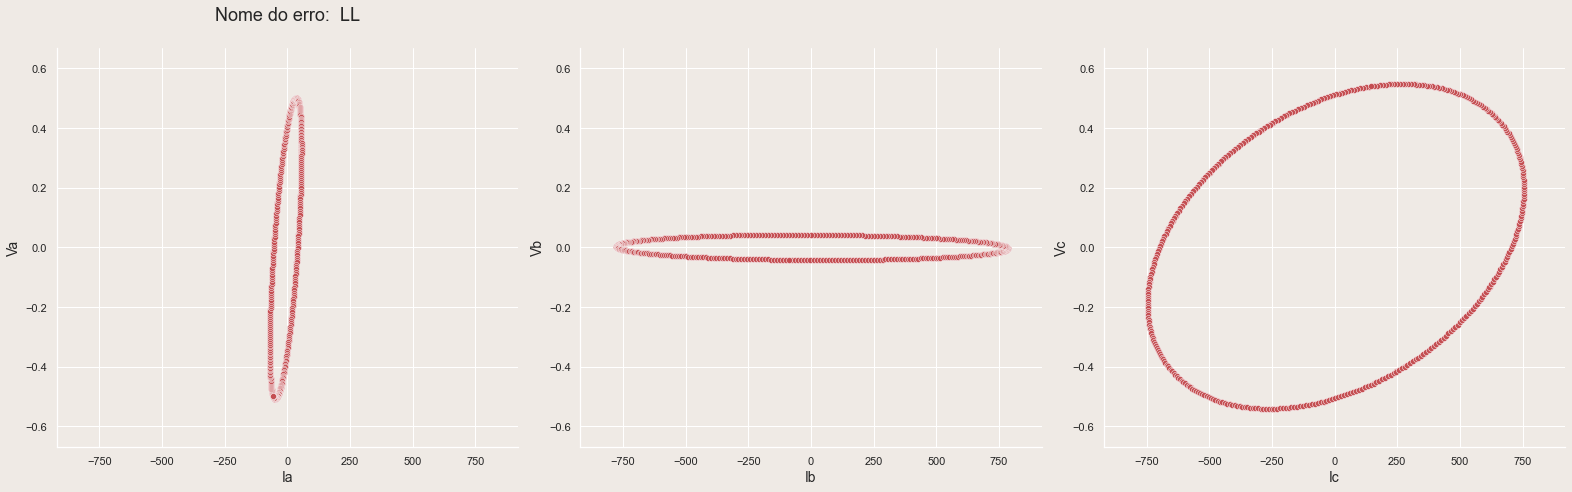

In [12]:
dic = {'Ia': 'Va', 'Ib': 'Vb', 'Ic': 'Vc'}
faultCode = ['0000', '1001', '1011', '0111', '0110']
for fault in faultCode:
    plotIxV(fault)
        

In [13]:
nf = df[df['faultCode']=='0000'].reset_index(drop=True)
lg = df[df['faultCode']=='1001'].reset_index(drop=True)
ll = df[df['faultCode']=='0110'].reset_index(drop=True)
llg = df[df['faultCode']=='1011'].reset_index(drop=True)
sym = df[df['faultCode']=='0111'].reset_index(drop=True)

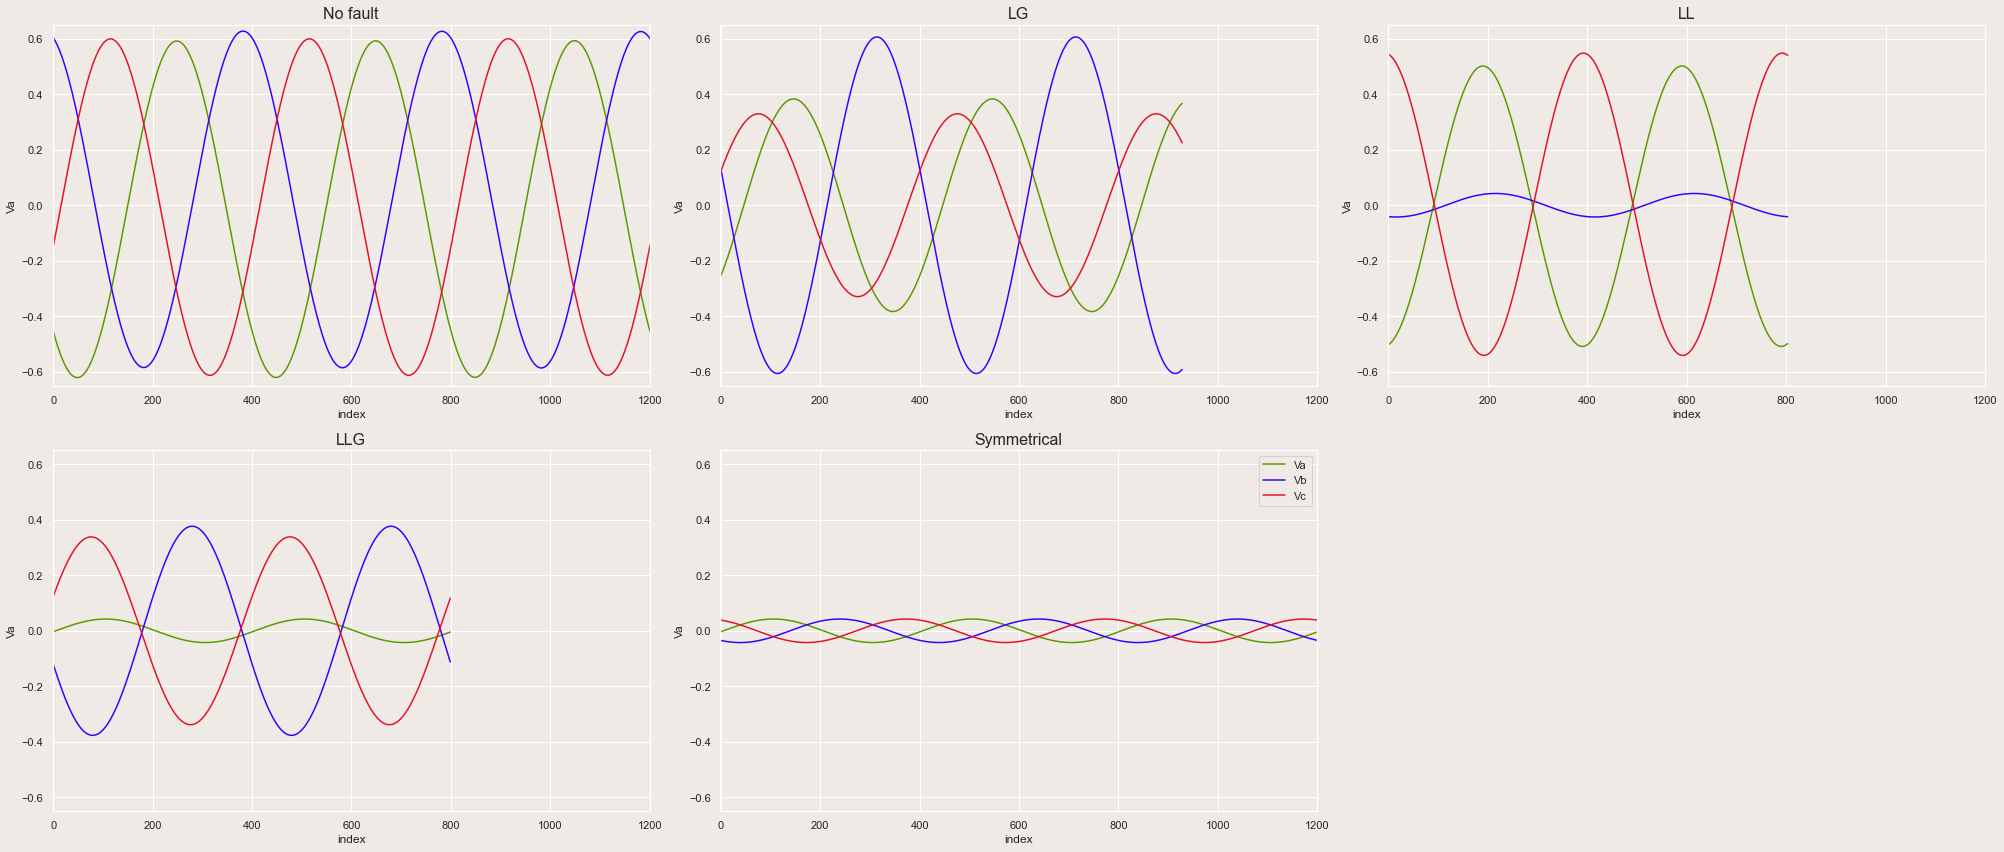

In [14]:
sns.set(rc={'axes.facecolor':'efeae5', 'figure.facecolor':'efeae5'})
fig, ax = plt.subplots(2, 3, figsize=(28, 12))

sns.lineplot(data=nf.reset_index(), x='index', y='Va', color='#5c9900', ax=ax[0][0])
sns.lineplot(data=nf.reset_index(), x='index', y='Vb', color='#3800ff', ax=ax[0][0])
sns.lineplot(data=nf.reset_index(), x='index', y='Vc', color='#e31329', ax=ax[0][0])
ax[0][0].set_title(f'No fault', {'fontsize': 16})

sns.lineplot(data=lg.reset_index(), x='index', y='Va', color='#5c9900', ax=ax[0][1])
sns.lineplot(data=lg.reset_index(), x='index', y='Vb', color='#3800ff', ax=ax[0][1])
sns.lineplot(data=lg.reset_index(), x='index', y='Vc', color='#e31329', ax=ax[0][1])
ax[0][1].set_title(f'LG', {'fontsize': 16})

sns.lineplot(data=ll.reset_index(), x='index', y='Va', color='#5c9900', ax=ax[0][2])
sns.lineplot(data=ll.reset_index(), x='index', y='Vb', color='#3800ff', ax=ax[0][2])
sns.lineplot(data=ll.reset_index(), x='index', y='Vc', color='#e31329', ax=ax[0][2])
ax[0][2].set_title(f'LL', {'fontsize': 16})

sns.lineplot(data=llg.reset_index(), x='index', y='Va', color='#5c9900', ax=ax[1][0])
sns.lineplot(data=llg.reset_index(), x='index', y='Vb', color='#3800ff', ax=ax[1][0])
sns.lineplot(data=llg.reset_index(), x='index', y='Vc', color='#e31329', ax=ax[1][0])
ax[1][0].set_title(f'LLG', {'fontsize': 16})

sns.lineplot(data=sym.reset_index(), x='index', y='Va', color='#5c9900', ax=ax[1][1], label='Va')
sns.lineplot(data=sym.reset_index(), x='index', y='Vb', color='#3800ff', ax=ax[1][1], label='Vb')
sns.lineplot(data=sym.reset_index(), x='index', y='Vc', color='#e31329', ax=ax[1][1], label='Vc')
ax[1][1].set_title(f'Symmetrical', {'fontsize': 16})

fig.delaxes(ax[1][2])
plt.legend()
plt.xlim(-1, 1300)
plt.setp(ax, xlim=(-1, 1200), ylim=(-0.65, 0.65))
plt.tight_layout()

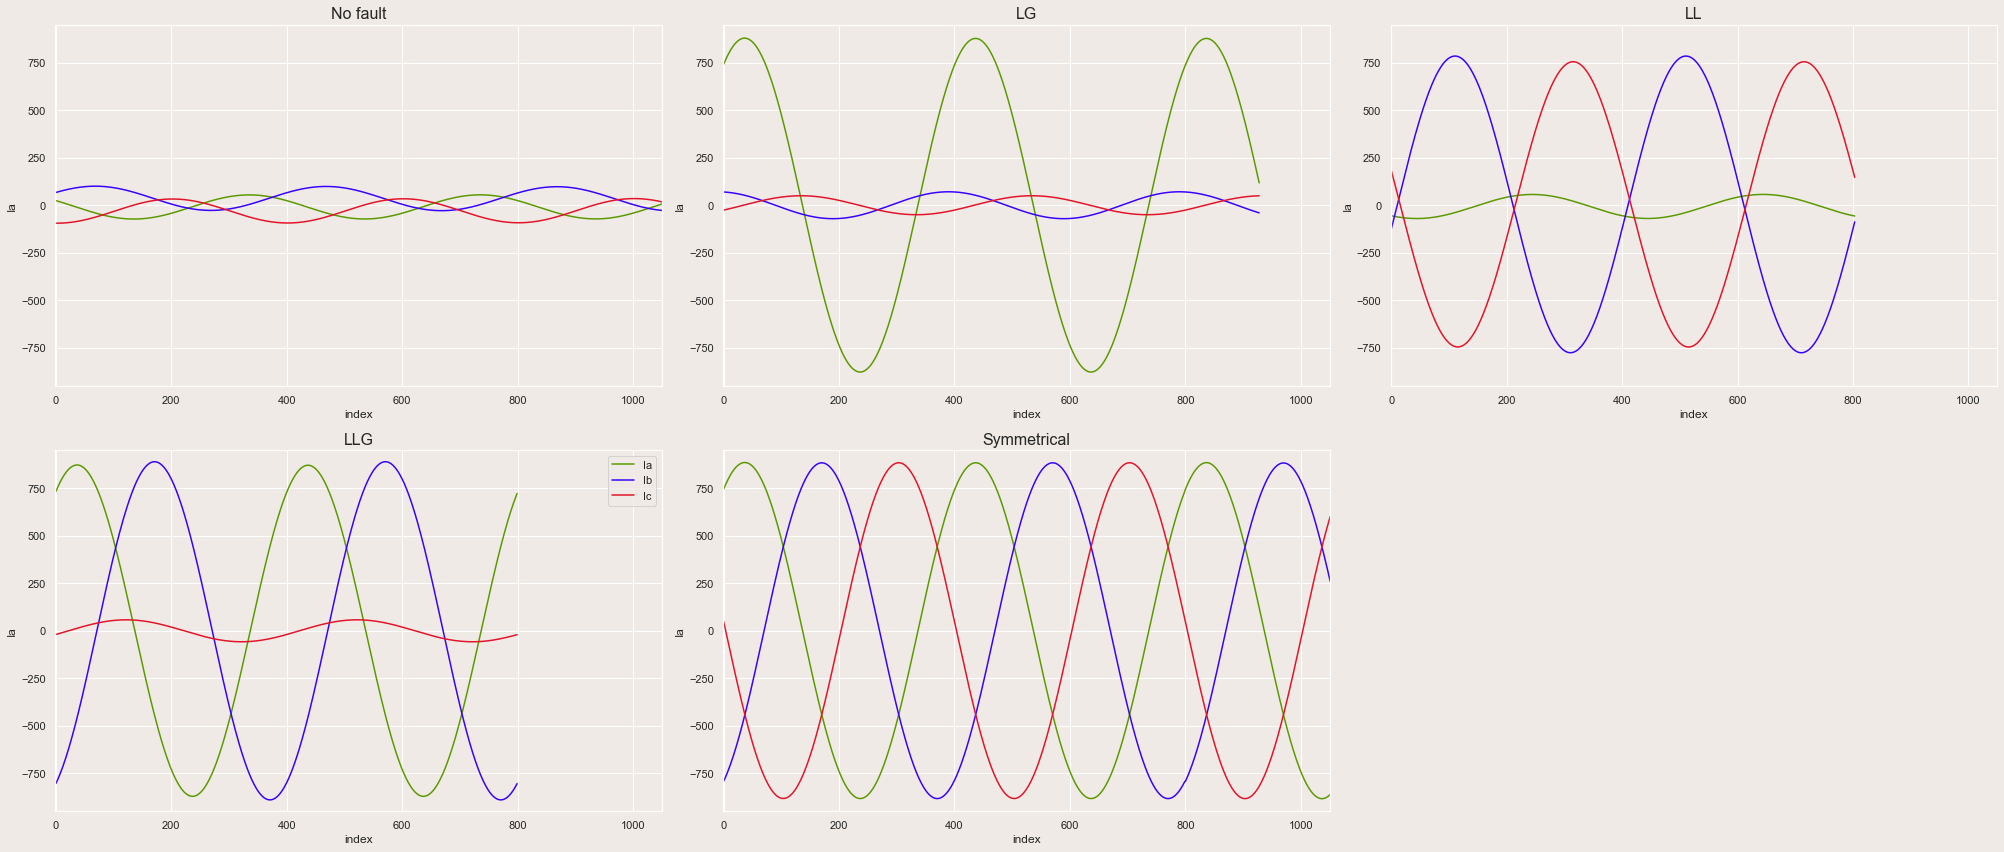

In [15]:
sns.set(rc={'axes.facecolor':'efeae5', 'figure.facecolor':'efeae5'})
fig, ax = plt.subplots(2, 3, figsize=(28, 12))

sns.lineplot(data=nf.reset_index(), x='index', y='Ia', color='#5c9900', ax=ax[0][0])
sns.lineplot(data=nf.reset_index(), x='index', y='Ib', color='#3800ff', ax=ax[0][0])
sns.lineplot(data=nf.reset_index(), x='index', y='Ic', color='#e31329', ax=ax[0][0])
ax[0][0].set_title(f'No fault', {'fontsize': 16})

sns.lineplot(data=lg.reset_index(), x='index', y='Ia', color='#5c9900', ax=ax[0][1])
sns.lineplot(data=lg.reset_index(), x='index', y='Ib', color='#3800ff', ax=ax[0][1])
sns.lineplot(data=lg.reset_index(), x='index', y='Ic', color='#e31329', ax=ax[0][1])
ax[0][1].set_title(f'LG', {'fontsize': 16})

sns.lineplot(data=ll.reset_index(), x='index', y='Ia', color='#5c9900', ax=ax[0][2])
sns.lineplot(data=ll.reset_index(), x='index', y='Ib', color='#3800ff', ax=ax[0][2])
sns.lineplot(data=ll.reset_index(), x='index', y='Ic', color='#e31329', ax=ax[0][2])
ax[0][2].set_title(f'LL', {'fontsize': 16})

sns.lineplot(data=llg.reset_index(), x='index', y='Ia', color='#5c9900', ax=ax[1][0], label='Ia')
sns.lineplot(data=llg.reset_index(), x='index', y='Ib', color='#3800ff', ax=ax[1][0], label='Ib')
sns.lineplot(data=llg.reset_index(), x='index', y='Ic', color='#e31329', ax=ax[1][0], label='Ic')
ax[1][0].set_title(f'LLG', {'fontsize': 16})

sns.lineplot(data=sym.reset_index(), x='index', y='Ia', color='#5c9900', ax=ax[1][1])
sns.lineplot(data=sym.reset_index(), x='index', y='Ib', color='#3800ff', ax=ax[1][1])
sns.lineplot(data=sym.reset_index(), x='index', y='Ic', color='#e31329', ax=ax[1][1])
ax[1][1].set_title(f'Symmetrical', {'fontsize': 16})

fig.delaxes(ax[1][2])
plt.setp(ax, xlim=(-1, 1050), ylim=(-950, 950))
plt.tight_layout()

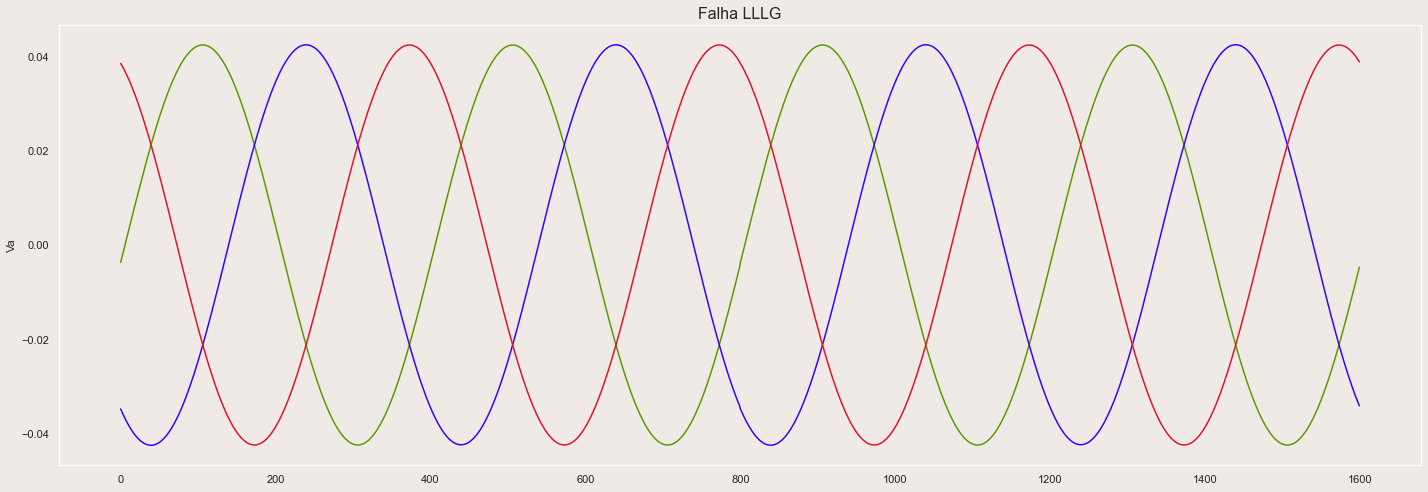

In [24]:
sns.set(rc={'axes.facecolor':'efeae5', 'figure.facecolor':'efeae5'})

plt.figure(figsize=(20,7))
sns.lineplot(data=sym.reset_index(), x='index', y='Va', color='#5c9900')
sns.lineplot(data=sym.reset_index(), x='index', y='Vb', color='#3800ff')
sns.lineplot(data=sym.reset_index(), x='index', y='Vc', color='#e31329')
plt.title('Falha LLLG', {'fontsize': 16})
plt.xlabel('')
plt.grid(False)
plt.tight_layout()
plt.show()